In [1]:
#PROJECT (Loan prediction)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#NAIVE BAYES CLASSIFIER MODEL
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#DATA PREPROCESSING

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
df= pd.read_csv('Financial_data.csv', low_memory=False)
df

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.00,0,0.00,0.00,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.00,0.00,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.00,0,0.00,0.00,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.00,0,0.00,0.00,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.00,0.00,116

In [5]:
df.head(5)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

In [6]:
df.tail(5)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0,BO73K5A6A,True,2015-01-01 07:17:03,2015-01-06,2019-02-13,2015-03-02,2020-02-03,2020-02-03,16,6,3.0,4,37,1977-02-07,0.0,FI,3000.0,3000.0,31.01,60,107.68,PÄIJÄT-HÄME,LAHTI,0,3.0,3.0,0,3.0,MoreThan5Years,Worker,15To25Years,1.0,5.0,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0,1,500.00,0,7.69,792.32,1,True,1411.60,3000.00,2019-02-12,1791.0,2015-03-02,1791.0,2015-03-02,0.146732,0.90,0.163368,0.125412,2015-05-04,0.00,2860.87,2779.85,3000.00,3000.00,2308.19,0.0,2.0,2018-12-21 10:08:52,1.0,E,NaN,NaN,0.146732,E,HR,Repaid,False,180+,180+,NaN,NaN,RL2,NaN,2308.19,0.00,691.81,1552.18,0.00,0.00,0,0.0,0.00,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1040.06,180+
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0,BO311A49,False,2015-01-05 07:56:22,2015-01-06,2019-02-07,2015-03-05,2020-02-05,2019-02-20,16,2,3.0,4,35,1979-05-17,0.0,FI,3000.0,3000.0,18.25,60,85.33,POHJOIS KARJAALA,JOENSUU,2,3.0,3.0,0,3.0,MoreThan5Years,MiddleManager,15To25Years,8.0,1.0,2265.0,0.0,0.0,0.0,0.0,0.0,0.0,2265.0,5,1777.46,0,31.58,520.67,7,True,0.00,16.32,2019-02-07,NaN,NaN,NaN,NaN,0.053246,0.90,0.129254,0.045510,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2018-07-23 17:00:07.437000000,1.0,B,NaN,NaN,0.053246,B,E,Repaid,False,NaN,31-60,NaN,NaN,RL2,NaN,3000.00,1990.03,0.00,0.00,0.00,0.00,1,3000.0,389.36,0.0,0,2017-06-27,2018-06-20,NaN,NaN,NaN,NaN,0.0,0.00,NaN
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0,BO41K639A,True,2014-12-28 15:01:47,2015-01-06,NaN,2015-03-02,2020-02-03,2020-02-03,13,6,1.0,4,40,1974-01-25,0.0,FI,2500.0,2500.0,24.83,60,80.42,VARSINAIS-SUOMI,SAUVO,0,3.0,1.0,1,5.0,MoreThan5Years,Owner,5To10Years,6.0,1.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,2,1350.00,0,3.22,1069.58,1,True,1264.45,2428.44,2020-01-17,1700.0,2015-06-01,1700.0,2015-06-01,0.104219,0.90,0.144081,0.089076,2015-08-04,558.68,2293.22,158

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(56), int64(14), object(39)
memory usage: 112.3+ MB


In [8]:
df.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PlannedPrincipalTillDate,PlannedInterestTillDate,CurrentDebtDaysPrimary,CurrentDebtDaysSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,ModelVersion,EL_V0,EL_V1,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134529.000000,134529.000000,127844.000000,134529.000000,134484.000000,134484.000000,134332.000000,134443.000000,132877.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,1.345290e+05,134529.000000,1.345290e+05,134529.000000,134484.000000,134484.000000,134529.000000,54459.000000,130587.000000,48518.000000,52250.000000,131893.000000,131893.000000,131893.000000,131893.000000,119692.000000,42915.000000,42915.000000,42915.000000,42915.000000,42915.000000,42915.000000,77241.000000,131893.000000,4569.000000,12922.000000,71722.00000,134529.000000,134529.000000,59129.000000,59129.000000,134529.000000,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,2727.947540,2543.872472,35.889583,46.151573,119.083443,0.343026,3.680713,-0.109165,0.153716,1.381708,3.357511,437.143384,18.802698,5.682848,2.390005,3.253239,2.359142,43.112825,1.724150e+03,3.181797,5.620270e+02,0.187313,7.769024,122.239119,11.143188,994.558014,708.883798,593.448019,612.733053,0.149255,0.409065,0.136558,0.252434,232.959918,849.838695,1099.982243,2351.471556,1909.285140,336.213893,15.150365,1.473440,4.718408,0.192519,0.186687,952.37584,761.476162,488.397102,24.574728,86.820368,1769.281104,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,2374.439168,2170.128183,26.288644,15.202688,114.737919,3.311925,1.174134,1.555404,1.940581,4.880079,2.844225,1786.569939,150.849487,38.385899,36.791193,77.523767,28.459953,459.081430,4.970166e+03,3.424242,3.383163e+04,0.896455,16.259688,692.480442,7.044104,1654.973527,1276.371901,569.495276,607.882018,0.119853,0.314768,0.075794,0.149629,721.414596,1271.781752,1514.736356,2084.825355,1939.821339,825.994549,177.149905,0.499297,1.883788,0.187765,0.170862,102.71751,1371.557801,827.805133,243.837975,781.437462,2030.546309,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,31.955800,6.390000,3.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0000

In [9]:
df['DefaultDate'].fillna('Nil',inplace=True)
#ADDING A TARGET VALUE
df['Default_Status'] = np.where(df['DefaultDate']=='Nil','Not Default','Default')
df

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\3068108062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DefaultDate'].fillna('Nil',inplace=True)


,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory,Default_Status
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.00,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.00,0,0.00,0.00,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.00,0.00,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,Not Default
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.00,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.00,0,0.00,0.00,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,Not Default
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.00,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.00,0,0.00,0.00,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN

In [10]:
df[['DefaultDate','Default_Status']]

,DefaultDate,Default_Status
0,Nil,Not Default
1,Nil,Not Default
2,2012-07-16,Default
3,Nil,Not Default
4,2009-09-28,Default
...,...,...
134524,2015-05-04,Default
134525,Nil,Not Default
134526,2015-08-04,Default
134527,2016-06-17,Default


In [11]:
#HANDLING MISSING DATA

In [12]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

ReportAsOfEOD                                  0
LoanId                                         0
LoanNumber                                     0
ListedOnUTC                                    0
BiddingStartedOn                               0
BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
UserName                                       0
NewCreditCustomer                              0
LoanApplicationStartedDate                     0
LoanDate                                       0
ContractEndDate                            75546
FirstPaymentDate                               0
MaturityDate_Original                          0
MaturityDate_Last                              0
ApplicationSignedHour                          0
ApplicationSignedWeekday                       0
VerificationType                              45
LanguageCode                                   0
Age                 

In [13]:
#dropped columns with more than 60% missing data

threshold = len(df) * 0.6
df.dropna(axis=1, thresh=threshold, inplace=True)

In [14]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

ReportAsOfEOD                                 0
LoanId                                        0
LoanNumber                                    0
ListedOnUTC                                   0
BiddingStartedOn                              0
BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
UserName                                      0
NewCreditCustomer                             0
LoanApplicationStartedDate                    0
LoanDate                                      0
FirstPaymentDate                              0
MaturityDate_Original                         0
MaturityDate_Last                             0
ApplicationSignedHour                         0
ApplicationSignedWeekday                      0
VerificationType                             45
LanguageCode                                  0
Age                                           0
DateOfBirth                             

In [15]:
#####droping unnecessory columns

In [16]:
#adding all unnecessary columns into a list 
droping_columns=['ReportAsOfEOD','LoanId','LoanNumber','ListedOnUTC','County','BiddingStartedOn','BidsPortfolioManager','BidsApi','BidsManual','UserName','LoanApplicationStartedDate','LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','ApplicationSignedHour','ApplicationSignedWeekday','DateOfBirth','IncomeFromPrincipalEmployer','IncomeFromPension','IncomeFromFamilyAllowance','IncomeFromSocialWelfare','IncomeFromLeavePay','IncomeFromChildSupport','IncomeOther','FreeCash','LastPaymentOn','DefaultDate','StageActiveSince','ModelVersion','Rating','CreditScoreEsMicroL']

In [17]:
#droping this list 
df.drop(droping_columns,axis=1,inplace=True)

In [18]:
# Checking null values in new dataset
df.isnull().sum()

NewCreditCustomer                             0
VerificationType                             45
LanguageCode                                  0
Age                                           0
Gender                                       45
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6685
City                                       9794
UseOfLoan                                     0
Education                                    45
MaritalStatus                                45
EmploymentStatus                            197
EmploymentDurationCurrentEmployer           876
OccupationArea                               86
HomeOwnershipType                          1652
IncomeTotal                                   0
ExistingLiabilities                     

In [19]:
# Returning the mode value of the column to fill null values 
VerificationType_mode = df['VerificationType'].mode()[0]
VerificationType_mode

#filling null values with mode value
df['VerificationType'] = df['VerificationType'].fillna(VerificationType_mode)

In [20]:
# Returning the mode value of the column to fill null values 
Gender_mode = df['Gender'].mode()[0]
Gender_mode

#filling null values with mode value
df['Gender'] = df['Gender'].fillna(Gender_mode)

In [21]:
# Returning the mean value of the column to fill null values 
MonthlyPayment_mean = df['MonthlyPayment'].mean()
MonthlyPayment_mean

#filling null values with mode value
df['MonthlyPayment'] = df['MonthlyPayment'].fillna(MonthlyPayment_mean)

In [22]:
# Returning the mode value of the column to fill null values 
City_mode = df['City'].mode()[0]
City_mode

#filling null values with mode value
df['City'] = df['City'].fillna(City_mode)

In [23]:
# Returning the mode value of the column to fill null values 
Education_mode = df['Education'].mode()[0]
Education_mode

#filling null values with mode value
df['Education'] = df['Education'].fillna(Education_mode)

In [24]:
# Returning the mode value of the column to fill null values 
MaritalStatus_mode = df['MaritalStatus'].mode()[0]
MaritalStatus_mode

#filling null values with mode value
df['MaritalStatus'] = df['MaritalStatus'].fillna(MaritalStatus_mode)

In [25]:
# Returning the mode value of the column to fill null values 
EmploymentStatus_mode = df['EmploymentStatus'].mode()[0]
EmploymentStatus_mode

#filling null values with mode value
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(EmploymentStatus_mode)

In [26]:
# Returning the mode value of the column to fill null values 
EmploymentDurationCurrentEmployer_mean = df['EmploymentDurationCurrentEmployer'].mode()[0]
EmploymentDurationCurrentEmployer_mean

#filling null values with mode value
df['EmploymentDurationCurrentEmployer'] = df['EmploymentDurationCurrentEmployer'].fillna(EmploymentDurationCurrentEmployer_mean)

In [27]:
# Returning the mean value of the column to fill null values 
OccupationArea_mean = df['OccupationArea'].mean()
OccupationArea_mean

#filling null values with mode value
df['OccupationArea'] = df['OccupationArea'].fillna(OccupationArea_mean)

In [28]:
# Returning the mean value of the column to fill null values 
HomeOwnershipType_mean = df['HomeOwnershipType'].mean()
HomeOwnershipType_mean

#filling null values with mode value
df['HomeOwnershipType'] = df['HomeOwnershipType'].fillna(HomeOwnershipType_mean)

In [29]:
# Returning the mean value of the column to fill null values 
DebtToIncome_mean = df['DebtToIncome'].mean()
DebtToIncome_mean

#filling null values with mode value
df['DebtToIncome'] = df['DebtToIncome'].fillna(DebtToIncome_mean)

In [30]:
# Returning the mean value of the column to fill null values 
PlannedInterestTillDate_mean = df['PlannedInterestTillDate'].mean()
PlannedInterestTillDate_mean

#filling null values with mode value
df['PlannedInterestTillDate'] = df['PlannedInterestTillDate'].fillna(PlannedInterestTillDate_mean)

In [31]:
# Returning the mean value of the column to fill null values 
ExpectedLoss_mean = df['ExpectedLoss'].mean()
ExpectedLoss_mean

#filling null values with mode value
df['ExpectedLoss'] = df['ExpectedLoss'].fillna(ExpectedLoss_mean)

In [32]:
# Returning the mean value of the column to fill null values 
LossGivenDefault_mean = df['LossGivenDefault'].mean()
LossGivenDefault_mean

#filling null values with mode value
df['LossGivenDefault'] = df['LossGivenDefault'].fillna(LossGivenDefault_mean)

In [33]:
# Returning the mean value of the column to fill null values 
ExpectedReturn_mean = df['ExpectedReturn'].mean()
ExpectedReturn_mean

#filling null values with mode value
df['ExpectedReturn'] = df['ExpectedReturn'].fillna(ExpectedReturn_mean)

In [34]:
# Returning the mean value of the column to fill null values 
ProbabilityOfDefault_mean = df['ProbabilityOfDefault'].mean()
ProbabilityOfDefault_mean

#filling null values with mode value
df['ProbabilityOfDefault'] = df['ProbabilityOfDefault'].fillna(ProbabilityOfDefault_mean)

In [35]:
# Returning the mean value of the column to fill null values 
PrincipalOverdueBySchedule_mean = df['PrincipalOverdueBySchedule'].mean()
PrincipalOverdueBySchedule_mean

#filling null values with mode value
df['PrincipalOverdueBySchedule'] = df['PrincipalOverdueBySchedule'].fillna(PrincipalOverdueBySchedule_mean)

In [36]:
# Returning the mode value of the column to fill null values 
WorseLateCategory_mode = df['WorseLateCategory'].mode()[0]
WorseLateCategory_mode

#filling null values with mode value
df['WorseLateCategory'] = df['WorseLateCategory'].fillna(WorseLateCategory_mode)

In [37]:
# Returning the mean value of the column to fill null values 
PreviousRepaymentsBeforeLoan_mean = df['PreviousRepaymentsBeforeLoan'].mean()
PreviousRepaymentsBeforeLoan_mean

#filling null values with mode value
df['PreviousRepaymentsBeforeLoan'] = df['PreviousRepaymentsBeforeLoan'].fillna(PreviousRepaymentsBeforeLoan_mean)

In [38]:
# Returning the mean value of the column to fill null values 
NextPaymentNr_mean = df['NextPaymentNr'].mean()
NextPaymentNr_mean

#filling null values with mode value
df['NextPaymentNr'] = df['NextPaymentNr'].fillna(NextPaymentNr_mean)

In [39]:
# Returning the mean value of the column to fill null values 
NrOfScheduledPayments_mean = df['NrOfScheduledPayments'].mean()
NrOfScheduledPayments_mean

#filling null values with mode value
df['NrOfScheduledPayments'] = df['NrOfScheduledPayments'].fillna(NrOfScheduledPayments_mean)

In [40]:
# Checking null values after handling 
df.isnull().sum()

NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
City                                      0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeTotal                               0
ExistingLiabilities                       0
LiabilitiesTotal                          0
RefinanceLiabilities            

In [41]:
#HANDLING DUPLICATE VALUES
df.drop_duplicates(inplace=True)

In [42]:
#UNIVAREATE

In [43]:
num=  df.select_dtypes(include=['number']).columns.tolist()
num

['VerificationType',
 'LanguageCode',
 'Age',
 'Gender',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'OccupationArea',
 'HomeOwnershipType',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'MonthlyPaymentDay',
 'PlannedInterestTillDate',
 'ExpectedLoss',
 'LossGivenDefault',
 'ExpectedReturn',
 'ProbabilityOfDefault',
 'PrincipalOverdueBySchedule',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPreviousLoansBeforeLoan',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'NextPaymentNr',
 'NrOfScheduledPayments']

In [44]:
cat = df.select_dtypes(include=['object']).columns.tolist()
cat

['Country',
 'City',
 'EmploymentDurationCurrentEmployer',
 'Status',
 'WorseLateCategory',
 'Default_Status']

In [45]:
#for i in num:
 # sns.histplot(df[i], bins=30, kde=True)
  #plt.show()

In [46]:
#for i in cat:
 # sns.histplot(df[i], bins=30, kde=True)
  #plt.show()

In [47]:
#BIVAREATE
#sns.pairplot(df)
#plt.show()

In [48]:
#DATA ENCODING


In [49]:
#labelencoder
le= LabelEncoder()
df['NewCreditCustomer']= le.fit_transform(df['NewCreditCustomer'])

In [50]:
#Label encoding the column Restructured
le= LabelEncoder()
df['Restructured']= le.fit_transform(df['Restructured'])

In [51]:
#Label encoding the column ActiveScheduleFirstPaymentReached
le = LabelEncoder()
df['ActiveScheduleFirstPaymentReached']= le.fit_transform(df['ActiveScheduleFirstPaymentReached'])

In [52]:
#Label encoding the column Default_Status
le = LabelEncoder()
df['Default_Status']= le.fit_transform(df['Default_Status'])

In [53]:
# Target Encoding the column Country
df['Country']=df['Country'].replace({'SK':3,'FI':2,'ES':1,'EE':0})

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\3316823418.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country']=df['Country'].replace({'SK':3,'FI':2,'ES':1,'EE':0})


In [54]:
# Target Encoding the column Status
df['Status']=df['Status'].replace({'Current':0,'Late':1,'Repaid':2})

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\1508594274.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status']=df['Status'].replace({'Current':0,'Late':1,'Repaid':2})


In [55]:
# Target Encoding the column WorseLateCategory
df['WorseLateCategory']=df['WorseLateCategory'].replace({'1-7':1,'121-150':4,'151-180':4,'16-30':3,'180+':0,'31-60':2,'61-90':4,'8-15':3,'91-120':4})

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\240322270.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['WorseLateCategory']=df['WorseLateCategory'].replace({'1-7':1,'121-150':4,'151-180':4,'16-30':3,'180+':0,'31-60':2,'61-90':4,'8-15':3,'91-120':4})


In [56]:
# Target Encoding the column EmploymentDurationCurrentEmployer
df['EmploymentDurationCurrentEmployer']=df['EmploymentDurationCurrentEmployer'].replace({'MoreThan5Years':0,'UpTo5Years':1,'UpTo1Year':1,'Retiree':2,'UpTo2Years':2,'UpTo3Years':3,'Other':3,'UpTo4Years':3,'TrialPeriod':3})

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\2794366170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EmploymentDurationCurrentEmployer']=df['EmploymentDurationCurrentEmployer'].replace({'MoreThan5Years':0,'UpTo5Years':1,'UpTo1Year':1,'Retiree':2,'UpTo2Years':2,'UpTo3Years':3,'Other':3,'UpTo4Years':3,'TrialPeriod':3})


In [57]:
# Changing the datatype of column VerificationType into integer.
df['VerificationType']=df['VerificationType'].astype('int')

In [58]:
# Changing the datatype of column Gender into integer.
df['Gender']=df['Gender'].astype('int')

In [59]:
# Changing the datatype of column Education into integer.
df['Education']=df['Education'].astype('int')

In [60]:
# Changing the datatype of column MaritalStatus into integer.
df['MaritalStatus']=df['MaritalStatus'].astype('int')

In [61]:
# Changing the datatype of column EmploymentStatus into integer.
df['EmploymentStatus']=df['EmploymentStatus'].astype('int')

In [62]:
# Changing the datatype of column HomeOwnershipType into integer.
df['HomeOwnershipType']=df['HomeOwnershipType'].astype('int')

In [63]:
# Changing the datatype of column OccupationArea into integer.
df['OccupationArea']=df['OccupationArea'].astype('int')

In [64]:
df.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedInterestTillDate,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,PrincipalOverdueBySchedule,Status,Restructured,WorseLateCategory,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,Default_Status
0,1,2,1,61,1,0,319.5582,115.0408,30.0,12,119.083443,TALLINN,7,3,1,3,3,7,3,10500.0,0,0.0,0,0.0,25,1,319.0800,0.149255,0.409065,0.136558,0.252434,232.959918,2,0,4,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,5.178795,50.126795,1
1,0,2,1,48,1,0,191.7349,140.6057,25.0,1,119.083443,KOHTLA-JARVE,7,5,4,3,0,16,3,10800.0,0,0.0,0,0.0,15,1,45.8300,0.149255,0.409065,0.136558,0.252434,232.959918,2,0,0,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,5.178795,50.126795,1
2,1,2,1,58,1,0,319.5582,319.5409,25.0,20,119.083443,PÄRNU,2,4,1,3,3,9,3,7000.0,0,0.0,0,0.0,25,1,197.2926,0.149255,0.409065,0.136558,0.252434,116.350000,1,1,0,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,5.178795,50.126795,0
3,1,2,1,23,1,0,127.8233,57.5205,45.0,15,119.083443,PALDISKI,0,2,3,-1,2,1,3,11600.0,0,0.0,0,0.0,15,1,293.1000,0.149255,0.409065,0.136558,0.252434,232.959918,2,0,2,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,5.178795,50.126795,1
4,1,2,1,25,1,0,319.5582,319.5436,30.0,12,119.083443,TARTU,6,4,2,3,2,7,3,6800.0,0,0.0,0,0.0,25,1,833.8100,0.149255,0.409065,0.136558,0.252434,232.959918,2,0,0,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,5.178795,50.126795,0


In [65]:
df.dtypes

NewCreditCustomer                           int64
VerificationType                            int32
LanguageCode                                int64
Age                                         int64
Gender                                      int32
Country                                     int64
AppliedAmount                             float64
Amount                                    float64
Interest                                  float64
LoanDuration                                int64
MonthlyPayment                            float64
City                                       object
UseOfLoan                                   int64
Education                                   int32
MaritalStatus                               int32
EmploymentStatus                            int32
EmploymentDurationCurrentEmployer           int64
OccupationArea                              int32
HomeOwnershipType                           int32
IncomeTotal                               float64


In [66]:
# CHECKING FOR OUTLIERS


In [67]:
#for i in num:
 # sns.boxplot(y=df[i], orient='h')
  #plt.show()

In [68]:
# CLEARING OUTLIERS

for i in num:

  q1= np.quantile(df[i],0.25)
  q3= np.quantile(df[i],0.75)
  IQR=q3-q1
  min_bound= q1-1.5*IQR
  max_bound= q3+1.5*IQR
  df.loc[df[i] > max_bound, i] = max_bound
  df.loc[df[i] < min_bound, i] = min_bound

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\972000114.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > max_bound, i] = max_bound
C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\972000114.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > max_bound, i] = max_bound
C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\972000114.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '78.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > max_bound, i] = max_bound
C:\Use

In [69]:
#for i in cat:
 # sns.boxplot(y=df[i], orient='h')
  #plt.show()

In [70]:
# CLEARING OUTLIERS

for i in cat:
    # Convert column to numeric (if not already)
    df[i] = pd.to_numeric(df[i], errors='coerce')
    
    # Optionally fill NaNs created by non-numeric values
    df[i] = df[i].fillna(df[i].median())

    q1= np.quantile(df[i],0.25)
    q3= np.quantile(df[i],0.75)
    IQR=q3-q1
    min_bound= q1-1.5*IQR
    max_bound= q3+1.5*IQR
    df.loc[df[i] > max_bound, i] = max_bound
    df.loc[df[i] < min_bound, i] = min_bound

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\2931619580.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > max_bound, i] = max_bound
C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\2931619580.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > max_bound, i] = max_bound
C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\2931619580.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > max_bound, i] = max_bound
C:\U

In [71]:
#CHECKING FOR CORRELATION USING HEATMAP

#sns.heatmap(df.corr(),annot=True)

In [72]:
df.drop(['City', 'RefinanceLiabilities', 'PreviousEarlyRepaymentsCountBeforeLoan'], axis=1, inplace=True)

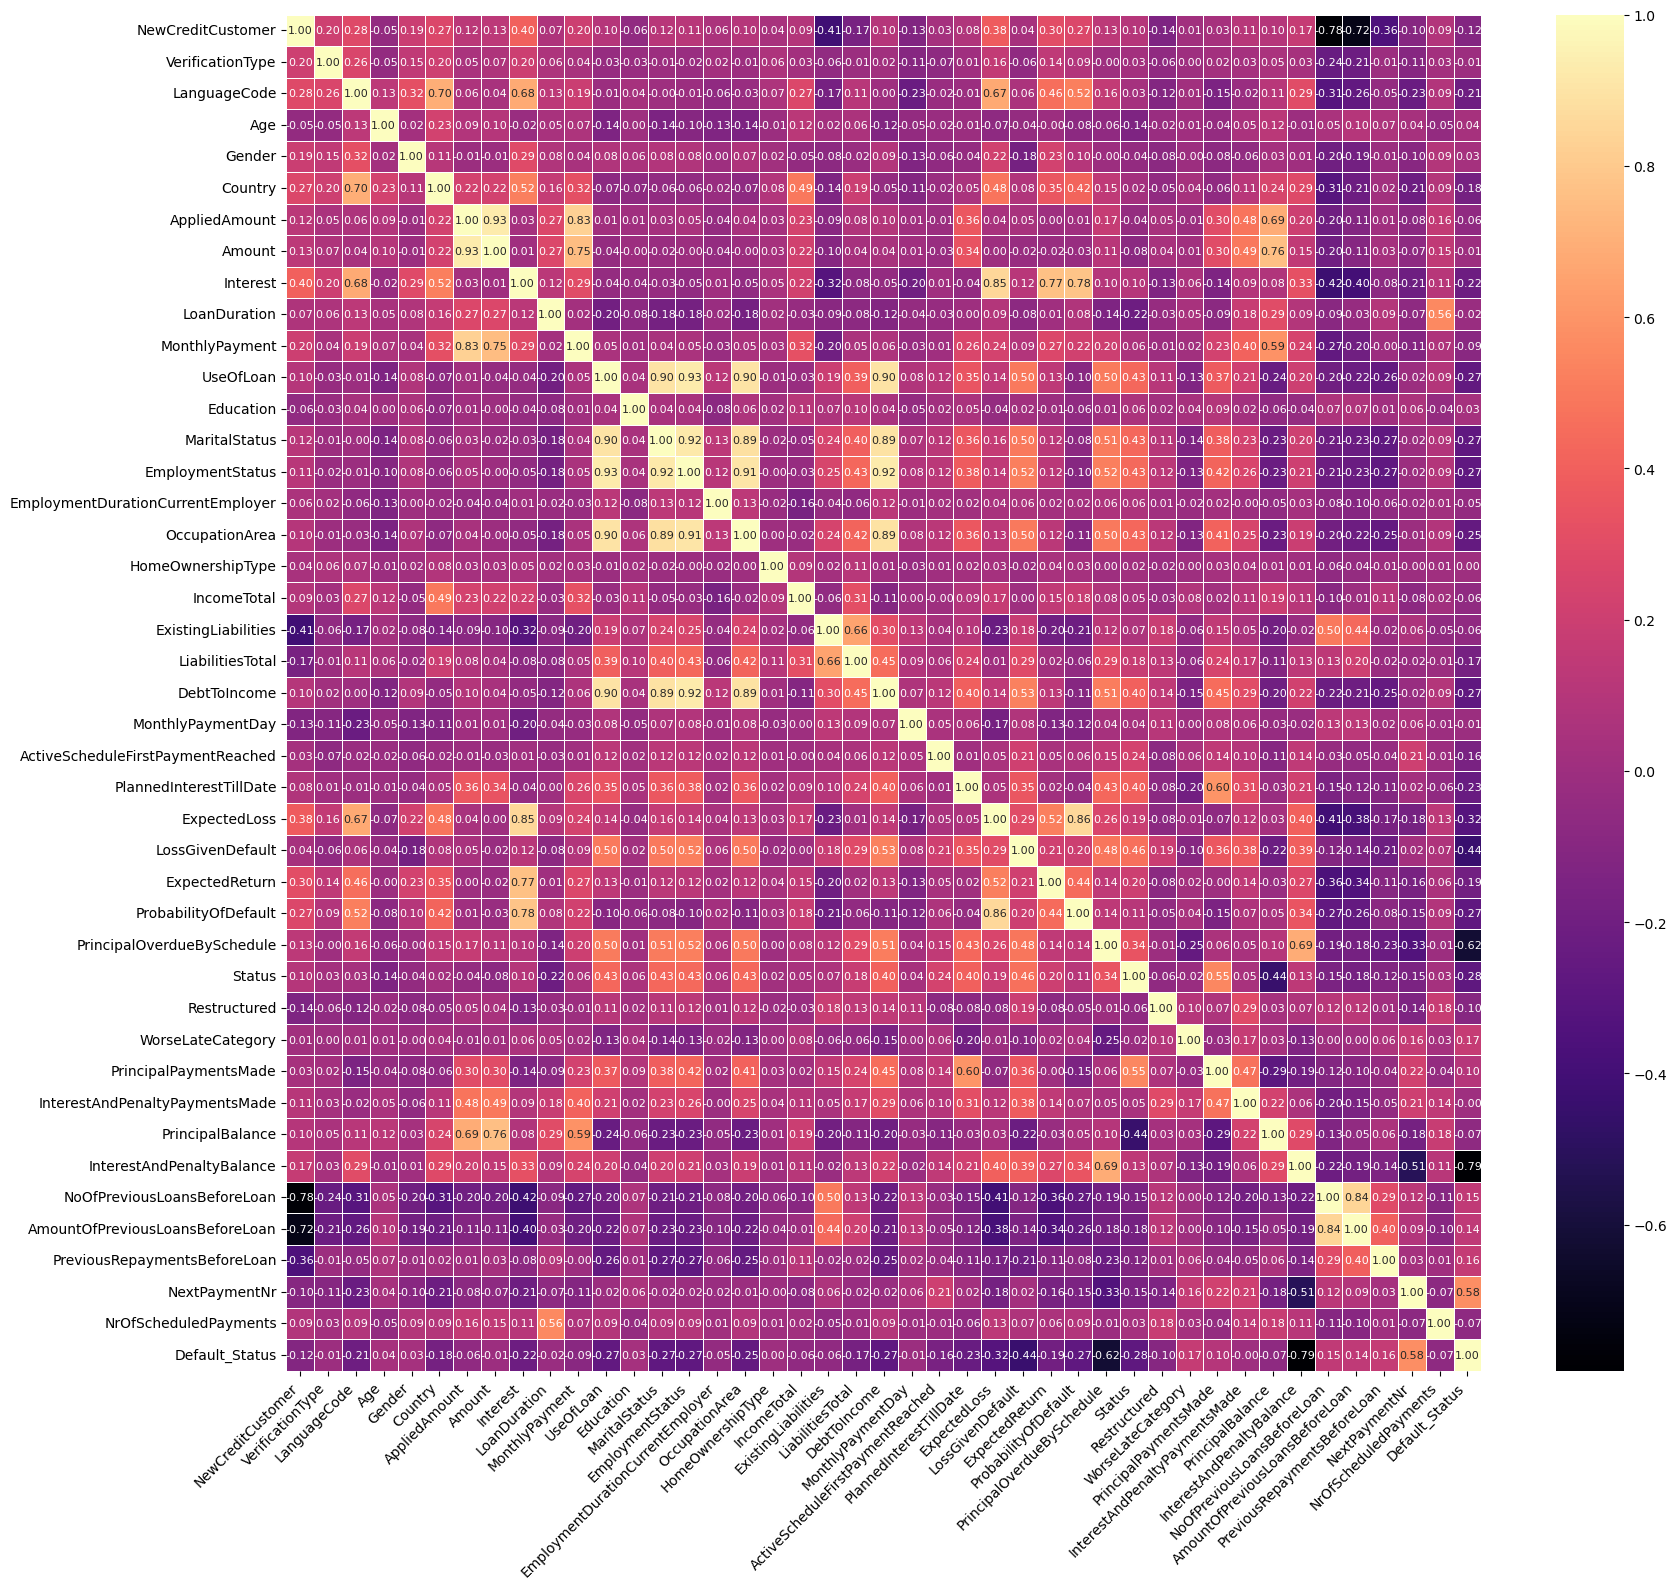

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 16))  # Increase figure size
corr = df.corr(numeric_only=True)  # Get correlation matrix
sns.heatmap(corr,
            annot=True,           # Show values
            fmt=".2f",            # Format numbers
            cmap="magma",         # Optional: better color map
            annot_kws={"size": 8},# Smaller text
            linewidths=0.5)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

In [74]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display correlation of all features with 'Default_Status'
default_corr = correlation_matrix['Default_Status'].sort_values(ascending=False)

# Display top positively correlated features
print("Top Positively Correlated Features with 'Default_Status':")
print(default_corr)

Top Positively Correlated Features with 'Default_Status':
Default_Status                       1.000000
NextPaymentNr                        0.579508
WorseLateCategory                    0.172079
PreviousRepaymentsBeforeLoan         0.159653
NoOfPreviousLoansBeforeLoan          0.150210
AmountOfPreviousLoansBeforeLoan      0.144584
PrincipalPaymentsMade                0.097649
Age                                  0.037676
Education                            0.029097
Gender                               0.028090
HomeOwnershipType                    0.002520
InterestAndPenaltyPaymentsMade      -0.000910
Amount                              -0.005654
VerificationType                    -0.007493
MonthlyPaymentDay                   -0.009609
LoanDuration                        -0.016449
EmploymentDurationCurrentEmployer   -0.045199
IncomeTotal                         -0.058269
ExistingLiabilities                 -0.059996
AppliedAmount                       -0.060104
NrOfScheduledPayments 

In [75]:
df_new=df[['NoOfPreviousLoansBeforeLoan','AmountOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan','NextPaymentNr','Default_Status']]



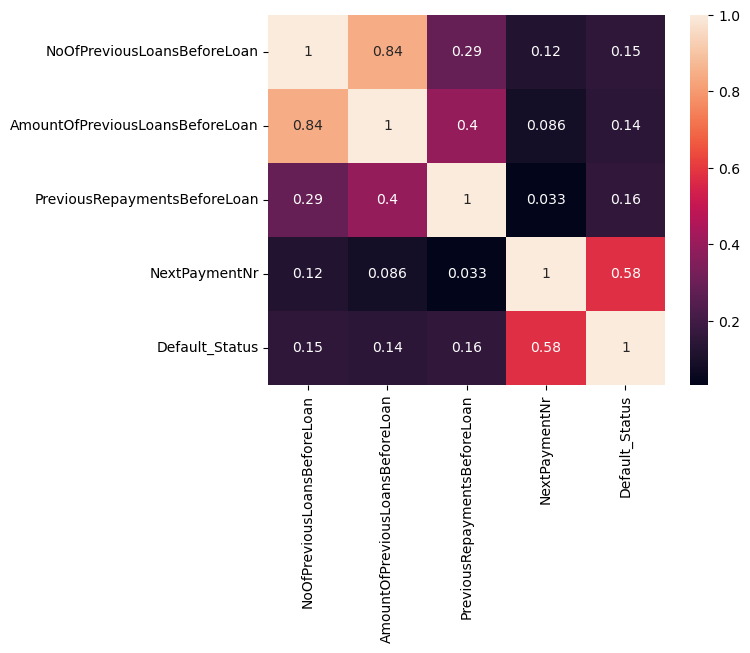

In [76]:
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [77]:
Selected=['NoOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan','NextPaymentNr','Default_Status']

In [78]:
new=df_new[Selected]
#new

In [79]:
# Standardizing the column PreviousRepaymentsBeforeLoan
PreviousRepaymentsBeforeLoan_std = StandardScaler()
df_new['PreviousRepaymentsBeforeLoan'] = PreviousRepaymentsBeforeLoan_std.fit_transform(df_new[['PreviousRepaymentsBeforeLoan']])

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\3612387171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PreviousRepaymentsBeforeLoan'] = PreviousRepaymentsBeforeLoan_std.fit_transform(df_new[['PreviousRepaymentsBeforeLoan']])


In [80]:
# Standardizing the column AmountOfPreviousLoansBeforeLoan
AmountOfPreviousLoansBeforeLoan_std = StandardScaler()
df_new['AmountOfPreviousLoansBeforeLoan'] = AmountOfPreviousLoansBeforeLoan_std.fit_transform(df_new[['AmountOfPreviousLoansBeforeLoan']])

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\1322021547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['AmountOfPreviousLoansBeforeLoan'] = AmountOfPreviousLoansBeforeLoan_std.fit_transform(df_new[['AmountOfPreviousLoansBeforeLoan']])


In [81]:
# Standardizing the column NextPaymentNr
NextPaymentNr_std = StandardScaler()
df_new['NextPaymentNr'] = NextPaymentNr_std.fit_transform(df_new[['NextPaymentNr']])

C:\Users\vinay\AppData\Local\Temp\ipykernel_18192\3098666248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['NextPaymentNr'] = NextPaymentNr_std.fit_transform(df_new[['NextPaymentNr']])


In [82]:
#MODEL BUILDING 

In [83]:
#df_new

In [84]:
#dropping the target variable to get only the input features
x=df_new.drop('Default_Status',axis=1)

In [85]:
#only taking the target variable
y=df_new['Default_Status']

In [86]:
#x

In [87]:
#y

In [88]:
#taking training data and test data by importing train_test_split_library
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
#x_train

In [90]:
#x_test

In [91]:
#y_train

In [92]:
#y_test

In [95]:
#MODEL BUILDING USING KNN ALGORITHMN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

#Training the knn model
model.fit(x_train,y_train)

KNeighborsClassifier()

In [96]:
#PREDICT THE OUTPUT
y_pred_model = model.predict(x_test)

In [97]:
y_pred_model

array([0., 0., 1., ..., 0., 0., 1.])

In [101]:
#y_test

In [102]:
output = pd.DataFrame({'y_test':np.array(y_test),'y_pred_model':y_pred_model})
#output

In [100]:
#TO GET ACCURACY OF THE MODEL

In [103]:
acc = accuracy_score(y_pred_model,y_test)
acc

0.9012116256597041

In [105]:
# Classification Report
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      8565
         1.0       0.97      0.88      0.92     18341

    accuracy                           0.90     26906
   macro avg       0.88      0.91      0.89     26906
weighted avg       0.91      0.90      0.90     26906



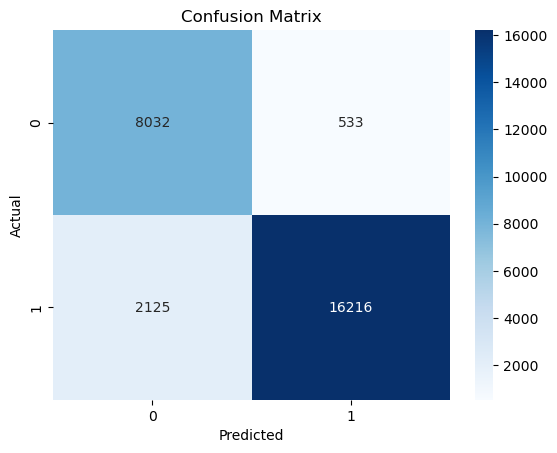

In [106]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_model), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [107]:
#MODEL BUIDING USING LOGISTIC REGRESSION

In [108]:
#MODEL BUILDING USING LogisticRegression
model = LogisticRegression()

#Training the knn model
model.fit(x_train,y_train)

LogisticRegression()

In [109]:
#PREDICT THE OUTPUT
y_pred_model = model.predict(x_test)

In [110]:
y_pred_model

array([1., 1., 1., ..., 1., 1., 1.])

In [111]:
#y_test

In [112]:
output = pd.DataFrame({'y_test':np.array(y_test),'y_pred_model':y_pred_model})
#output

In [113]:
#TO GET ACCURACY OF THE MODEL

In [114]:
acc = accuracy_score(y_pred_model,y_test)
acc

0.8212294655467182

In [116]:
# Classification Report
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71      8565
         1.0       0.86      0.88      0.87     18341

    accuracy                           0.82     26906
   macro avg       0.80      0.79      0.79     26906
weighted avg       0.82      0.82      0.82     26906



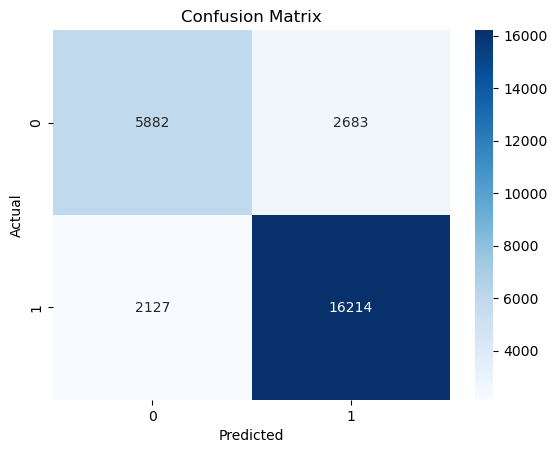

In [117]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_model), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [118]:
#MODEL BUILDING USING DECISION TREE 
model = DecisionTreeClassifier()

#Training the model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [119]:
#predict the output
y_pred_model = model.predict(x_test)
y_pred_model

array([1., 1., 1., ..., 1., 1., 1.])

In [120]:
#y_test

In [121]:
output = pd.DataFrame({'y_test':np.array(y_test),'y_pred_model':y_pred_model})
#output

In [122]:
#TO GET ACCURACY 

In [123]:
acc = accuracy_score(y_pred_model,y_test)
acc

0.9132907158254664

In [124]:
# Classification Report
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      8565
         1.0       0.90      0.98      0.94     18341

    accuracy                           0.91     26906
   macro avg       0.92      0.87      0.89     26906
weighted avg       0.92      0.91      0.91     26906



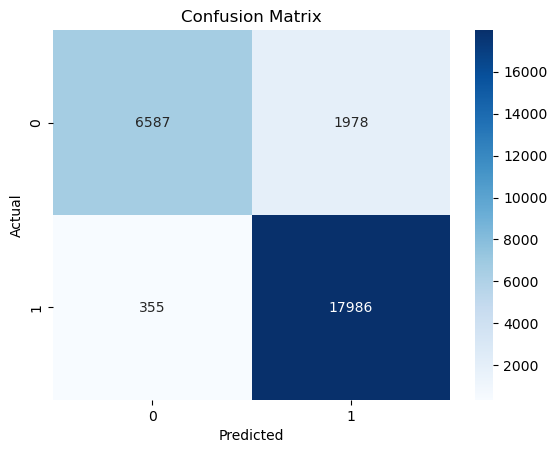

In [125]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_model), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [126]:
#MODEL BUILDING USING RANDOMFOREST
model = RandomForestClassifier()

#Train the model
model.fit(x_train,y_train)

RandomForestClassifier()

In [127]:
#predict the output
y_pred_model = model.predict(x_test)
y_pred_model

array([1., 1., 1., ..., 1., 1., 1.])

In [128]:
#y_test

In [129]:
output = pd.DataFrame({'y_test':np.array(y_test),'y_pred_model':y_pred_model})
#output

In [130]:
#TO GET ACCURACY

In [131]:
acc = accuracy_score(y_pred_model,y_test)
acc

0.9172675239723481

In [132]:
# Classification Report
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85      8565
         1.0       0.90      0.99      0.94     18341

    accuracy                           0.92     26906
   macro avg       0.93      0.88      0.90     26906
weighted avg       0.92      0.92      0.91     26906



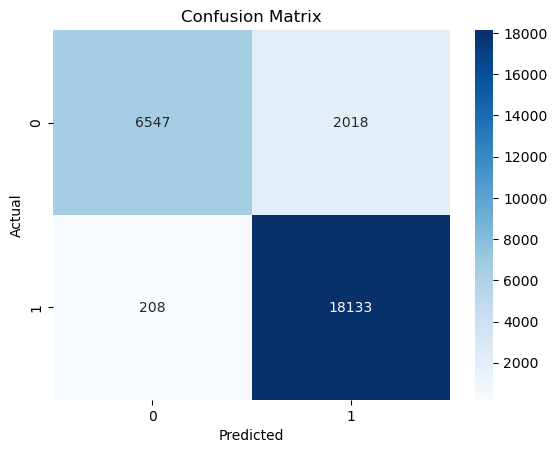

In [133]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_model), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [134]:
#MODEL BUILDING USING ADABOOST

In [135]:
#buliding model using AdaBoost
model = AdaBoostClassifier()

#Train the model
model.fit(x_train,y_train)

c:\Users\vinay\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [136]:
#predict the output
y_pred_model = model.predict(x_test)
y_pred_model

array([1., 1., 1., ..., 1., 1., 1.])

In [137]:
#y_test

In [138]:
output = pd.DataFrame({'y_test':np.array(y_test),'y_pred_model':y_pred_model})
#output

In [139]:
#TO GET ACCURACY

In [140]:
acc = accuracy_score(y_pred_model,y_test)
acc

0.92124433211923

In [141]:
# Classification Report
print(classification_report(y_test, y_pred_model))

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86      8565
         1.0       0.90      1.00      0.95     18341

    accuracy                           0.92     26906
   macro avg       0.95      0.88      0.90     26906
weighted avg       0.93      0.92      0.92     26906



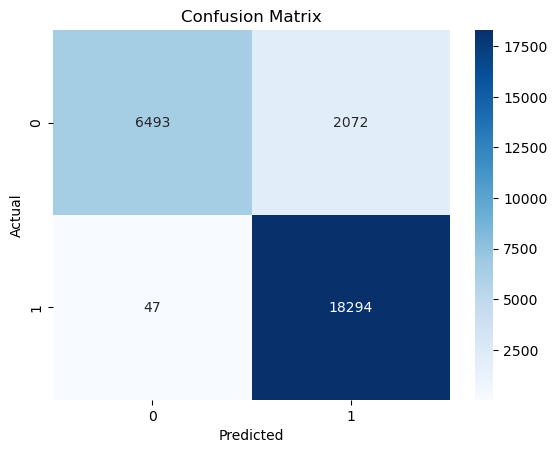

In [142]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_model), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [143]:
#EUCILIDEAN DISTANCE

In [144]:
import numpy as np

# Two points in 2D
point1 = np.array([2, 3])
point2 = np.array([5, 7])

# Euclidean distance
distance = np.linalg.norm(point1 - point2)
print(f"Euclidean Distance: {distance}")


Euclidean Distance: 5.0


In [150]:
#SUPPOT VECTOR MECHINE

In [151]:
svm_model = SVC(kernel='linear', C=1, gamma='scale')

svm_model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [152]:
y_pred = svm_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.844309819371144
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.75      0.75      8565
         1.0       0.88      0.89      0.89     18341

    accuracy                           0.84     26906
   macro avg       0.82      0.82      0.82     26906
weighted avg       0.84      0.84      0.84     26906

